In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [ ]:
from util import *
import os
import torch
#import tensorflow as tf
from cnn.model import ConvBlock
#import cnn_tf.model as tf_model
import numpy as np

In [ ]:
# disable all tensorflow logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
# Load config file
file_path = os.path.join(os.getcwd(), 'config_files', 'config2.txt')
config_file = load_yaml(file_path)

## Test ConvBlock

In [ ]:
# create a tensor with numpy an convert it to pytorch tensor
X = np.random.rand(1, 6, 6, 3).astype(np.float32)
x_torch = torch.from_numpy(X)
#x_tf = tf.convert_to_tensor(X, dtype=tf.float32)

In [ ]:
kernel = 3
stride = 1
filters = 32
mu=0.9
epsilon=2e-5
conv_block = ConvBlock(kernel = kernel,
                       in_channels = x_torch.shape[3],
                       strides = stride, 
                       filters = filters, 
                       mu=mu,
                       epsilon=epsilon)

In [ ]:
# tf_conv_block = tf_model.ConvBlock(kernel = kernel,
#                                    strides = stride,
#                                    filters = filters,
#                                    mu=mu, 
#                                    epsilon=epsilon)

In [ ]:
#np.isclose(x_torch, x_tf).all()

In [ ]:
#y_torch = conv_block(x_torch).detach().numpy()
#y_tf = tf_conv_block(x_tf, name="conv_block")

#print(f"torch: {y_torch.shape}, tensorflow: {y_tf.shape}")

In [ ]:
#np.isclose(y_torch, y_tf).all()

## Test Max Pooling

In [ ]:
from cnn.model import MaxPooling

In [ ]:
# create a a image tensor to test the max pooling layer
max_pool = MaxPooling(kernel=3, strides=1)
#tf_max_pool = tf_model.MaxPooling(kernel=3, strides=1)

#y_tf = tf_max_pool(x_tf, name="max_pool")
y_torch = max_pool(x_torch).detach().numpy()

#print(f"torch: {y_torch.shape}, tensorflow: {y_tf.shape}")
print(f"torch: {y_torch.shape}")

In [ ]:
#np.isclose(y_torch, y_tf).all()

## Test Avg Pooling

In [ ]:
from cnn.model import AvgPooling

avg_pool = AvgPooling(kernel=3, strides=1)
y_torch = avg_pool(x_torch).detach().numpy()

#tf_avg_pool = tf_model.AvgPooling(kernel=3, strides=1)
#y_tf = tf_avg_pool(x_tf, name='avg_pool')

#print(f"torch: {y_torch.shape}, tensorflow: {y_tf.shape}")
print(f"torch: {y_torch.shape}")

In [ ]:
#np.isclose(y_torch, y_tf).all()

## Test Stocastic Pooling

In [ ]:
from cnn.model import StochasticPooling

stoc_pool = StochasticPooling(kernel=3, strides=1)
y_torch = stoc_pool(x_torch).detach().numpy()

#tf_stoc_pool = tf_model.AvgPooling(kernel=3, strides=1)
#y_tf = tf_stoc_pool(x_tf, name='stoc_pool')

#print(f"torch: {y_torch.shape}, tensorflow: {y_tf.shape}")
print(f"torch: {y_torch.shape}")

## Attention Pooling

In [ ]:
x_torch.shape

In [ ]:
from cnn.model import AttentionPooling

stoc_pool = AttentionPooling(in_channels=x_torch.shape[1],kernel=3, strides=1)
y_torch = stoc_pool(x_torch).detach().numpy()

#tf_stoc_pool = tf_model.AvgPooling(kernel=3, strides=1)
#y_tf = tf_stoc_pool(x_tf, name='stoc_pool')

#print(f"torch: {y_torch.shape}, tensorflow: {y_tf.shape}")
print(f"torch: {y_torch.shape}")

In [ ]:
from cnn.model import AttentionPooling2

stoc_pool = AttentionPooling2(kernel=3, strides=1)
y_torch = stoc_pool(x_torch).detach().numpy()

#tf_stoc_pool = tf_model.AvgPooling(kernel=3, strides=1)
#y_tf = tf_stoc_pool(x_tf, name='stoc_pool')

#print(f"torch: {y_torch.shape}, tensorflow: {y_tf.shape}")
print(f"torch: {y_torch.shape}")

## Test Fully Connected Layer

In [ ]:
# create a tensor with numpy an convert it to pytorch tensor
X = np.random.rand(32, 6, 6, 3).astype(np.float32)
x_torch = torch.from_numpy(X)
#x_tf = tf.convert_to_tensor(X, dtype=tf.float32)

In [ ]:
from cnn.model import FullyConnected

# flatten the tensor
num_features = x_torch.shape[1] * x_torch.shape[2] * x_torch.shape[3]
units = 20

fc_torch = FullyConnected(input_features=num_features, units=units)
#fc_tf = tf_model.FullyConnected(units=units)

x_tor = torch.reshape(x_torch, [-1, num_features])
#x_tfl = tf.reshape(x_tf, [-1, num_features])

y_torch = fc_torch(x_tor).detach().numpy()
#y_tf = fc_tf(x_tfl, name='fc')

#print(f"torch: {y_torch.shape}, tensorflow: {y_tf.shape}")
print(f"torch: {y_torch.shape}")

In [ ]:
np.isclose(y_torch, y_tf).all()

## Test Pad Feature

In [ ]:
# create a tensor with numpy an convert it to pytorch tensor
X = np.random.rand(1, 6, 6, 8).astype(np.float32)
X1 = np.random.rand(1, 6, 6, 6).astype(np.float32)

x_torch = torch.from_numpy(X)
x_tf = tf.convert_to_tensor(X, dtype=tf.float32)

x_torch1 = torch.from_numpy(X1)
x_tf1 = tf.convert_to_tensor(X1, dtype=tf.float32)


In [ ]:
from cnn.model import pad_features

torch_tensors = [x_torch, x_torch1]
tf_tensors = [x_tf, x_tf1]


torch_padded = pad_features(tensors=torch_tensors)
tf_padded = tf_model.pad_features(tensors=tf_tensors)

torch_padded[0].shape, torch_padded[1].shape, tf_padded[0].shape, tf_padded[1].shape

## Test ResidualV1

In [ ]:
# create a tensor with numpy an convert it to pytorch tensor
X = np.random.rand(1, 3, 64, 64).astype(np.float32)
x_torch = torch.from_numpy(X)
#x_tf = tf.convert_to_tensor(X, dtype=tf.float32)

In [ ]:
from cnn.model import ResidualV1CBAM

kernel = 3
stride = 1
filters = 32
mu=0.9
epsilon=2e-5
Res_v1 = ResidualV1CBAM(kernel = kernel,
                    in_channel = x_torch.shape[1],
                    strides = stride, 
                    filters = filters, 
                    mu=mu,
                    epsilon=epsilon)

In [ ]:
Res_v1

In [ ]:
# tf_Res = tf_model.ResidualV1(kernel = kernel,
#                        strides = stride, 
#                        filters = filters, 
#                        mu=mu,
#                        epsilon=epsilon)

In [ ]:
np.isclose(x_torch, x_tf).all()

In [ ]:
y_torch = Res_v1(x_torch).detach().numpy()
#y_tf = tf_Res(x_tf, name="conv_block")

#print(f"torch: {y_torch.shape}, tensorflow: {y_tf.shape}")

In [ ]:
np.isclose(y_torch, y_tf).all()

## Test ResidualV1Pr

In [ ]:
# create a tensor with numpy an convert it to pytorch tensor
X = np.random.rand(1, 6, 6, 3).astype(np.float32)
x_torch = torch.from_numpy(X)
x_tf = tf.convert_to_tensor(X, dtype=tf.float32)

In [ ]:
from cnn.model import ResidualV1Pr

kernel = 3
stride = 1
filters = 32
mu=0.9
epsilon=2e-5
Res_v1Pr = ResidualV1Pr(kernel = kernel,
                    in_channel = x_torch.shape[3],
                    strides = stride, 
                    filters = filters, 
                    mu=mu,
                    epsilon=epsilon)

In [ ]:
Res_v1Pr

In [ ]:
tf_ResPR = tf_model.ResidualV1Pr(kernel = kernel,
                       strides = stride, 
                       filters = filters, 
                       mu=mu,
                       epsilon=epsilon)

In [ ]:
y_torch = Res_v1Pr(x_torch).detach().numpy()
y_tf = tf_ResPR(x_tf, name="conv_block")

print(f"torch: {y_torch.shape}, tensorflow: {y_tf.shape}")

## Test Depthwise Separable Convolution Block

In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [ ]:
import torch.nn as nn
import torch
from cnn.model import DepthConvBlock

In [ ]:
# Example usage
in_channels = 3
filters = 64
kernel_size = 3

In [ ]:
depthwise_conv = DepthConvBlock(kernel=kernel_size,
                                in_channels=in_channels,
                                filters=filters)
input_data = torch.randn((1, in_channels, 64, 64))
print("Input shape:", input_data.shape)

output_data = depthwise_conv(input_data)
print("Output shape:", output_data.shape)

## Test CBAM: Convolutional Block Attention Module

In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [ ]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Example usage
in_channels = 3
filters = 64
kernel_size = 3

## Test Deformable Convolution

In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [ ]:
import torch.nn as nn
import torch
from cnn.model import DeformableConvBlock

In [ ]:
# Example usage
in_channels = 3
filters = 64
kernel_size = 3

In [ ]:
deformable_block  = DeformableConvBlock(kernel=kernel_size,
                                in_channels=in_channels,
                                filters=filters)
input_data = torch.randn((1, in_channels, 64, 64))
print("Input shape:", input_data.shape)

output_data = deformable_block(input_data)
print("Output shape:", output_data.shape)

In [ ]:
deformable_block

## Test Inverted Residual Block

In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [ ]:
import torch.nn as nn
import torch
from cnn.model import InvertedResidualBlock

In [ ]:
# Example usage
in_channels = 3
filters = 64
kernel_size = 3

In [ ]:
inverted_block  = InvertedResidualBlock(kernel=kernel_size,
                                in_channels=in_channels,
                                filters=filters)
input_data = torch.randn((1, in_channels, 64, 64))
print("Input shape:", input_data.shape)

output_data = inverted_block(input_data)
print("Output shape:", output_data.shape)

In [ ]:
InvertedResidualBlock

## Test Flops Calculation

In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [ ]:
import torch
import torch.nn as nn
from fvcore.nn import FlopCountAnalysis # https://github.com/facebookresearch/fvcore/tree/main

In [ ]:
# Example model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 8 * 8, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        return x

model = SimpleModel()

In [ ]:
# Example input
input = torch.randn(10, 3, 32, 32)

# Compute FLOPS
flop_counter = FlopCountAnalysis(model, input)
print(f"FLOPs: {flop_counter.total()}")

# Alternatively, print a detailed breakdown
print(flop_counter.by_operator())

# total number of parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params}")

In [ ]:
flop_counter.by_module()

## Test NetworkGraph

In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [1]:
import copy
import qnas_config as cfg
from cnn.model import NetworkGraph
import numpy as np
import torch

In [2]:
phase = 'evolution'
experiment_path = 'my_exp_config3'
config_file = 'config_files_turbofan/config1.txt'

args = {
    'experiment_path': experiment_path,
    'config_file': config_file,
    'data_path': 'turbofan_data',
    'log_level': 'INFO',
    'log_level': 'INFO',
    'fitness_metric': 'best_loss',
    'optimizer': 'adamw',
    'data_augmentation': 'False',
    'dataset': 'turbofan',
    'save_checkpoints_epochs': 10,
    'early_stopping': 'False',
    'en_pop_crossover': 'False',
    'network_config': 'default',
    'network_gap': 'False',
    'limit_data_value': 100000,
}

In [3]:
config = cfg.ConfigParameters(args, phase=phase)
config.get_parameters()

In [4]:
fn_dict=config.fn_dict

In [ ]:
net_list = ['conv_3_1_64', 'avg_pool_2_2', 'avg_pool_2_2', 'conv_5_1_64', 'conv_5_1_128', 'conv_5_1_64']
#net_list = ['max_pool_2_2', 'no_op', 'no_op', 'conv_5_1_64', 'no_op', 'no_op']
#net_list = ['seconv_1_1_32_red4', 'seconv_1_1_32', 'max_pool_2_2', 'conv_1_1_32', 'max_pool_2_2', 'max_pool_2_2', 'conv_1_1_64', 
#             'avg_pool_2_2', 'mbconv_3_1_32', 'conv_3_1_64', 'avg_pool_2_2', 'no_op', 'avg_pool_2_2', 'no_op', 
#             'mbeppga_3_1_128', 'no_op', 'mbeppga_3_1_32_expand3_red16', 'mbconv_3_1_32', 'no_op', 'no_op']

In [6]:
filtered_dict = {key: item for key, item in fn_dict.items() if key in net_list}
filtered_dict

{'conv_3_1_64': {'function': 'ConvBlock',
  'params': {'kernel': 3, 'strides': 1, 'filters': 64}},
 'conv_5_1_64': {'function': 'ConvBlock',
  'params': {'kernel': 5, 'strides': 1, 'filters': 64}},
 'conv_5_1_128': {'function': 'ConvBlock',
  'params': {'kernel': 5, 'strides': 1, 'filters': 128}},
 'avg_pool_2_2': {'function': 'AvgPooling',
  'params': {'kernel': 2, 'strides': 2}}}

In [7]:
net = NetworkGraph(num_classes=1, in_channels=1)

In [8]:
net.create_functions(fn_dict=filtered_dict, net_list=net_list)
input_random = torch.randn(32, 1, 15, 15)

_ = net(input_random)

In [9]:
net

NetworkGraph(
  (model): Sequential(
    (0): ConvBlock(
      (activation): ReLU()
      (conv): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch_norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): AvgPooling(
      (avg_pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
    )
    (2): AvgPooling(
      (avg_pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
    )
    (3): ConvBlock(
      (activation): ReLU()
      (conv): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (batch_norm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (4): ConvBlock(
      (activation): ReLU()
      (conv): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (batch_norm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (5): ConvBlock(
      (activation): ReLU()
      (conv): Conv2d(128, 64, kern

In [10]:
X = np.random.rand(2, 1, 15, 15).astype(np.float32)
x_torch = torch.from_numpy(X)
#x_tf = tf.convert_to_tensor(X, dtype=tf.float32)

In [11]:
logits = net(inputs=x_torch, debug=True)

Layer output shape: torch.Size([2, 64, 15, 15])
Layer output shape: torch.Size([2, 64, 7, 7])
Layer output shape: torch.Size([2, 64, 3, 3])
Layer output shape: torch.Size([2, 64, 3, 3])
Layer output shape: torch.Size([2, 128, 3, 3])
Layer output shape: torch.Size([2, 64, 3, 3])


In [12]:
logits.shape

torch.Size([2, 1])

## Pytorch Dataset

In [13]:
from cnn.input import GenericDataLoader
import copy
import qnas_config as cfg

In [14]:
phase = 'evolution'
dataset = "turbofan"
exp_path_base = f"exp_{dataset}"
exp = "exp1"
i = 1
exp_path = f"{exp_path_base}/{exp}_repeat_{i}"
experiment_path = exp_path
config_file = 'config_files_turbofan/config1.txt'

args = {
    'experiment_path': experiment_path,
    'config_file': config_file,
    'data_path': 'turbofan_data',
    'log_level': 'INFO',
    'fitness_metric': 'best_loss',
    'optimizer': 'adamw',
    'data_augmentation': 'False',
    'dataset': 'turbofan',
    'save_checkpoints_epochs': 10,
    'early_stopping': 'False',
	'en_pop_crossover': 'False',
    'network_config': 'default',
    'network_gap': 'False',
    'limit_data_value': 100000,
}

config = cfg.ConfigParameters(args, phase=phase)
config.get_parameters()

fn_dict=config.fn_dict
fn_dict_tf = copy.deepcopy(fn_dict)
fn_dict

net_list = ['conv_3_1_256','no_op', 'conv_3_1_128', 'no_op','no_op','no_op',
            'conv_3_1_64','conv_3_1_64','no_op','conv_3_1_256','conv_3_1_256',
            'max_pool_2_2', 'conv_3_1_128', 'no_op','no_op','no_op','no_op','no_op',
            'max_pool_2_2', 'conv_3_1_128']

params = config.train_spec

In [15]:
params

{'batch_size': 32,
 'eval_batch_size': 1000,
 'max_epochs': 6,
 'epochs_to_eval': 5,
 'optimizer': 'adamw',
 'fitness_metric': 'best_loss',
 'mo_metric_base': 'loss',
 'mixed_precision': True,
 'available_gpus': [0, 1],
 'device': 'cuda:0',
 'dataset': 'turbofan',
 'data_augmentation': 'False',
 'subtract_mean': True,
 'limit_data': True,
 'limit_data_value': 100000,
 'num_workers': 1,
 'num_classes': 1,
 'task': 'regression',
 'save_checkpoints_epochs': 10,
 'save_summary_epochs': 0.25,
 'threads': 1,
 'max_params': 114090,
 'max_inference_time': 1000,
 'network_config': 'default',
 'network_gap': 'False',
 'decay': 0.9,
 'learning_rate': 0.001,
 'momentum': 0.0,
 'weight_decay': 0.0001,
 'experiment_path': 'exp_turbofan/exp1_repeat_1',
 'data_path': 'turbofan_data',
 'phase': 'evolution',
 'log_level': 'INFO'}

In [16]:
data_loader = GenericDataLoader(params=params)

In [17]:
train_loader, val_loader = data_loader.get_loader(pin_memory_device='cuda:0')

In [18]:
train_loader.dataset.X.shape

torch.Size([17307, 1, 15, 15])

In [19]:
selected_images = next(iter(val_loader))[0][:10]
selected_images.shape

torch.Size([10, 1, 15, 15])

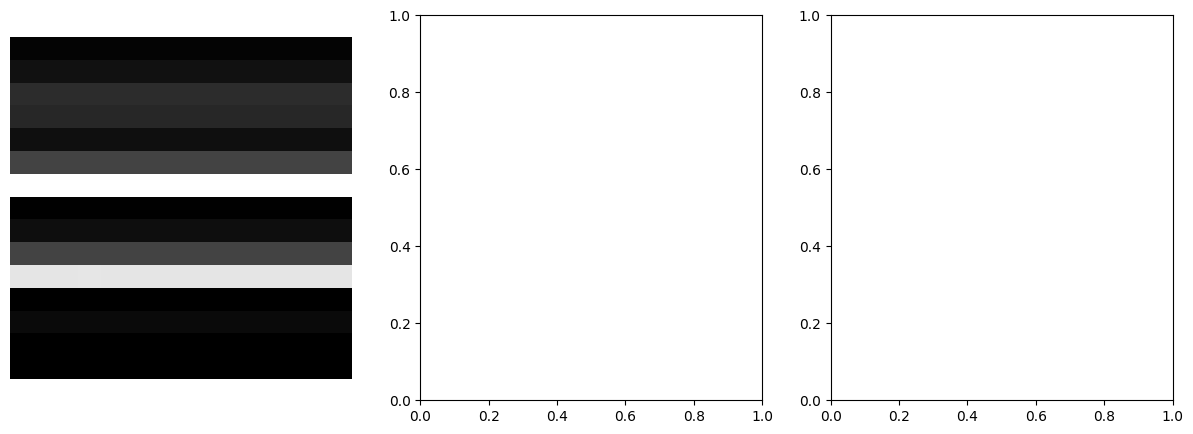

In [20]:
# show the channels of the first image
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(i):
    axs[i].imshow(selected_images[0, i, :, :].detach().numpy(), cmap='gray')
    axs[i].axis('off')
plt.show()

In [21]:
len(selected_images)

10

In [22]:
data = next(iter(val_loader))
min_value = data[0].min().item()
max_value = data[0].max().item()

print("Min Value:", min_value)
print("Max Value:", max_value)

Min Value: 1.0
Max Value: 9215.58984375


In [23]:
print(f"Size of train dataset: {len(train_loader)}")
print(f"Size of validation dataset: {len(val_loader)}")

Size of train dataset: 541
Size of validation dataset: 2


In [24]:
# # Initialize a dictionary to count images per class
# class_counts = {}  # Create an empty dictionary
# 
# # Iterate through the DataLoader to count images per class
# loaders = [train_loader, val_loader]
# for loader in loaders:
#     for batch in loader:
#         _, targets = batch
#         for label in targets:
#             label = label.item()  # Convert the tensor label to an integer
#             if label not in class_counts:
#                 class_counts[label] = 0  # Initialize the count to 0 if it doesn't exist
#             class_counts[label] += 1
#     print("-" * 50)
#     # Print the counts for each class
#     for class_label, count in class_counts.items():
#         print(f"Class {class_label}: {count} images")
#     class_counts = {}  # Reset the dictionary

In [25]:
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
            # The normalize code -> t.sub_(m).div_(s)
        return tensor
unorm = UnNormalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2470, 0.2435, 0.2616))

In [26]:
import torch
import numpy as np

In [27]:
# # plot some images of the pytorch train_loader
# import matplotlib.pyplot as plt# 

# cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']
# figure = plt.figure(figsize=(5, 5))
# cols, rows = 5, 3
# train_imgs, train_labels = next(iter(train_loader))
# for i in range(1, cols * rows + 1):
#     sample_idx = torch.randint(len(train_imgs), size=(1,)).item()
#     img, label = train_imgs[sample_idx], train_labels[sample_idx]
#     img = unorm(img)
#     npimg = img.numpy()
#     figure.add_subplot(rows, cols, i)
#     plt.title(cifar10_classes[label])
#     plt.axis("off")
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
# plt.autoscale(enable=True, axis='both', tight=True)
# plt.show()

In [28]:
# phase = 'evolution'
# experiment_path = 'my_exp_config3'
# config_file = 'config_files_cifar/config2.txt'
# 
# args = {
#     'experiment_path': experiment_path,
#     'config_file': config_file,
#     'data_path': 'cifar100_data',
#     'log_level': 'INFO',
#     'fitness_metric': 'best_accuracy',
#     'optimizer': 'adamw',
#     'data_augmentation': 'False',
#     'dataset': 'Cifar10',
#     'save_checkpoints_epochs': 10,
# }
# 
# config = cfg.ConfigParameters(args, phase=phase)
# config.get_parameters()
# 
# fn_dict=config.fn_dict
# fn_dict_tf = copy.deepcopy(fn_dict)
# fn_dict
# 
# net_list = ['conv_3_1_256','no_op', 'conv_3_1_128', 'no_op','no_op','no_op',
#             'conv_3_1_64','conv_3_1_64','no_op','conv_3_1_256','conv_3_1_256',
#             'max_pool_2_2', 'conv_3_1_128', 'no_op','no_op','no_op','no_op','no_op',
#             'max_pool_2_2', 'conv_3_1_128']
# 
# params = config.train_spec
# params['dataset'] = "Cifar100"

In [29]:
data_loader_cifar100 = GenericDataLoader(params=params)

In [30]:
train_loader, val_loader = data_loader_cifar100.get_loader()

In [31]:
print(f"train_loader: {len(train_loader)}, val_loader: {len(val_loader)}")

train_loader: 541, val_loader: 2


In [32]:
val_loader.dataset.X.shape

torch.Size([1924, 1, 15, 15])

In [33]:
unorm_ = UnNormalize(mean=(0.5071, 0.4865, 0.4411), std=(0.2673, 0.2564, 0.2761))

In [34]:
# figure = plt.figure(figsize=(5, 5))
# cols, rows = 3, 3
# train_imgs, train_labels = next(iter(train_loader))
# for i in range(1, cols * rows + 1):
#     sample_idx = torch.randint(len(train_imgs), size=(1,)).item()
#     img, label = train_imgs[sample_idx], train_labels[sample_idx]
#     img = unorm_(img)
#     npimg = img.numpy()
#     figure.add_subplot(rows, cols, i)
#     plt.title(label)
#     plt.axis("off")
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
# plt.show()

# Time 

In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [ ]:
from util import calculate_time
import time

In [ ]:
start = 0
step_time = 60 * 10 # 10 minutes
end = 5 * step_time # 50 minutes
calculate_time(start, end, 5, 20, end_evol=False)

# Train and Test

In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [35]:
import copy
import qnas_config as cfg
from cnn.input import GenericDataLoader

In [36]:
phase = 'evolution'
experiment_path = 'my_exp_config3'
config_file = 'config_files_turbofan/config1.txt'

args = {
    'experiment_path': experiment_path,
    'config_file': config_file,
    'data_path': 'turbofan_data',
    'log_level': 'INFO',
    'log_level': 'INFO',
    'fitness_metric': 'best_loss',
    'optimizer': 'adamw',
    'data_augmentation': 'False',
    'dataset': 'turbofan',
    'save_checkpoints_epochs': 10,
    'early_stopping': 'False',
    'en_pop_crossover': 'False',
    'network_config': 'default',
    'network_gap': 'False',
    'limit_data_value': 100000,
}

config = cfg.ConfigParameters(args, phase=phase)
config.get_parameters()

fn_dict=config.fn_dict

# net_list = ['dconv_3_1_256','no_op', 'dconv_3_1_128', 'no_op','no_op','no_op',
#             'dconv_3_1_64','dconv_3_1_64','no_op','dconv_3_1_256','dconv_3_1_256',
#             'max_pool_2_2', 'dconv_3_1_128', 'no_op','no_op','no_op','no_op','no_op',
#             'max_pool_2_2', 'dconv_3_1_128']
# net_list = ['conv_3_1_256','no_op', 'cbam_7_7', 'no_op','no_op','no_op',
#             'conv_3_1_64','conv_3_1_64','no_op','conv_3_1_256','conv_3_1_256',
#             'max_pool_2_2', 'cbam_3_3', 'no_op','no_op','no_op','no_op','no_op',
#             'max_pool_2_2', 'conv_3_1_128']

#net_list = ['cbam_5_5', 'dconv_5_1_32', 'cbam_7_7', 'cbam_5_5', 'no_op', 'cbam_5_5', 'cbam_5_5', 'avg_pool_2_2', 
#            'cbam_7_7', 'no_op', 'no_op', 'no_op', 'no_op', 'conv_3_1_64', 'no_op', 'no_op', 'no_op', 'cbam_3_3', 'no_op', 'conv_1_1_32']

# net_list = ['cbamconv_3_1_64', 'cbamconv_5_1_128', 'max_pool_2_2', 'resv1cbam_5_1_64', 'no_op', 'cbamconv_3_1_64', 
#             'resv1cbam_1_1_32', 'no_op', 'max_pool_2_2', 'conv_1_1_64', 'conv_1_1_128', 'cbamconv_5_1_64', 'avg_pool_2_2', 
#             'no_op', 'cbamconv_1_1_64', 'avg_pool_2_2', 'max_pool_2_2', 'no_op', 'cbamconv_5_1_32', 'avg_pool_2_2']


# net_list = ['avg_pool_2_2','no_op', 'avg_pool_2_2','no_op','bv1_3_1_256','avg_pool_2_2',
#             'bv1_3_1_128','no_op','max_pool_2_2', 'bv1p_3_1_128', 'bv1_3_1_256', 'no_op',
#             'max_pool_2_2', 'max_pool_2_2','avg_pool_2_2','max_pool_2_2','bv1_3_1_64','avg_pool_2_2']

In [37]:
# et_list = ['no_op', 'bv1_3_1_128', 'max_pool_2_2','max_pool_2_2',
#            'no_op', 'bv1_3_1_128', 'avg_pool_2_2', 'avg_pool_2_2',
#            'no_op', 'bv1_3_1_256', 'no_op','bv1_3_1_128','bv1_3_1_128',
#            'bv1p_3_1_128', 'bv1_3_1_256', 'max_pool_2_2','max_pool_2_2',
#            'no_op', 'no_op', 'avg_pool_2_2']
# 
net_list = ['conv_3_1_64', 'avg_pool_2_2', 'avg_pool_2_2', 'conv_5_1_64', 'conv_5_1_128', 'conv_5_1_64']

In [38]:
params = config.train_spec

In [39]:
import torch

desired_gpus = params["available_gpus"]
device_list = [f'cuda:{i}' for i in desired_gpus if i < torch.cuda.device_count()]
device_list

['cuda:0']

In [40]:
params['device'] = device_list[0]
params['num_workers'] = 4
params['mixed_precision'] = True
params['batch_size'] = 32
params['eval_batch_size'] = 16
params['max_epochs'] = 10
params['epochs_to_eval'] = 9
params['fn_dict'] = fn_dict

In [41]:
# from util import estimate_model_memory

In [42]:
# peak_memory = estimate_model_memory(net_list, params)

In [43]:
# Convert the peak memory from bytes to MB
# eak_memory = peak_memory / 1024**2
# rint(f"Peak memory: {peak_memory} MB")

In [44]:
# has_cbam_key = any(key.startswith("cbam") for key in fn_dict)
# has_cbam_key

In [45]:
from cnn.train import fitness_calculation

In [46]:
data_loader = GenericDataLoader(params=params)
train_loader, val_loader = data_loader.get_loader(pin_memory_device=device_list[0])

In [47]:
train_loader.dataset.X.shape

torch.Size([17307, 1, 15, 15])

In [48]:
results_dict = fitness_calculation(id_num="job_0", params=params, fn_dict=fn_dict, net_list=net_list, train_loader=train_loader, val_loader=val_loader,return_val=0 ,debug=True)
#results_dict["best_accuracy"]

/home/marcelo/Documentos/python-venv/qnas/lib/python3.9/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/home/marcelo/Documentos/python-venv/qnas/lib/python3.9/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([27])) that is different to the input size (torch.Size([27, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/home/marcelo/Documentos/python-venv/qnas/lib/python3.9/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect result

Epoch [10/10] - Training Loss: 36.4798 - Validation Loss: 36.5613 - Validation Accuracy: 0.62%


In [49]:
params

{'batch_size': 32,
 'eval_batch_size': 16,
 'max_epochs': 10,
 'epochs_to_eval': 9,
 'optimizer': 'adamw',
 'fitness_metric': 'best_loss',
 'mo_metric_base': 'loss',
 'mixed_precision': True,
 'available_gpus': [0, 1],
 'device': 'cuda:0',
 'dataset': 'turbofan',
 'data_augmentation': 'False',
 'subtract_mean': True,
 'limit_data': True,
 'limit_data_value': 100000,
 'num_workers': 4,
 'num_classes': 1,
 'task': 'regression',
 'save_checkpoints_epochs': 10,
 'save_summary_epochs': 0.25,
 'threads': 1,
 'max_params': 114090,
 'max_inference_time': 1000,
 'network_config': 'default',
 'network_gap': 'False',
 'decay': 0.9,
 'learning_rate': 0.001,
 'momentum': 0.0,
 'weight_decay': 0.0001,
 'experiment_path': 'my_exp_config3',
 'data_path': 'turbofan_data',
 'phase': 'evolution',
 'log_level': 'INFO',
 'fn_dict': {'conv_1_1_32': {'function': 'ConvBlock',
   'params': {'kernel': 1, 'strides': 1, 'filters': 32}},
  'conv_1_1_64': {'function': 'ConvBlock',
   'params': {'kernel': 1, 'stride

In [50]:
results_dict

{'training_losses': [42.89283499656015,
  36.48152470897174,
  36.48032990489121,
  36.479944740337714,
  36.4798745738821,
  36.479823914561386,
  36.47979559343095,
  36.47962109042184,
  36.47973714958938,
  36.47977392862993],
 'training_accuracies': [0.5084647830357659,
  0.5084647830357659,
  0.5084647830357659,
  0.5084647830357659,
  0.5084647830357659,
  0.5084647830357659,
  0.5084647830357659,
  0.5084647830357659,
  0.5084647830357659,
  0.5084647830357659],
 'validation_losses': [36.55578108858471,
  36.558468653150825,
  36.55911027892562,
  36.559562241735534,
  36.55986086002066,
  36.56004648760331,
  36.55930397727273,
  36.56081321022727,
  36.561305526859506],
 'validation_accuracies': [0.6237006237006237,
  0.6237006237006237,
  0.6237006237006237,
  0.6237006237006237,
  0.6237006237006237,
  0.6237006237006237,
  0.6237006237006237,
  0.6237006237006237,
  0.6237006237006237],
 'cuda_inference_time': 1030.1828384399414,
 'model_memory_usage': 29.67529296875,
 'to

In [51]:
from util import plot_training_history

In [52]:
results_dict

{'training_losses': [42.89283499656015,
  36.48152470897174,
  36.48032990489121,
  36.479944740337714,
  36.4798745738821,
  36.479823914561386,
  36.47979559343095,
  36.47962109042184,
  36.47973714958938,
  36.47977392862993],
 'training_accuracies': [0.5084647830357659,
  0.5084647830357659,
  0.5084647830357659,
  0.5084647830357659,
  0.5084647830357659,
  0.5084647830357659,
  0.5084647830357659,
  0.5084647830357659,
  0.5084647830357659,
  0.5084647830357659],
 'validation_losses': [36.55578108858471,
  36.558468653150825,
  36.55911027892562,
  36.559562241735534,
  36.55986086002066,
  36.56004648760331,
  36.55930397727273,
  36.56081321022727,
  36.561305526859506],
 'validation_accuracies': [0.6237006237006237,
  0.6237006237006237,
  0.6237006237006237,
  0.6237006237006237,
  0.6237006237006237,
  0.6237006237006237,
  0.6237006237006237,
  0.6237006237006237,
  0.6237006237006237],
 'cuda_inference_time': 1030.1828384399414,
 'model_memory_usage': 29.67529296875,
 'to

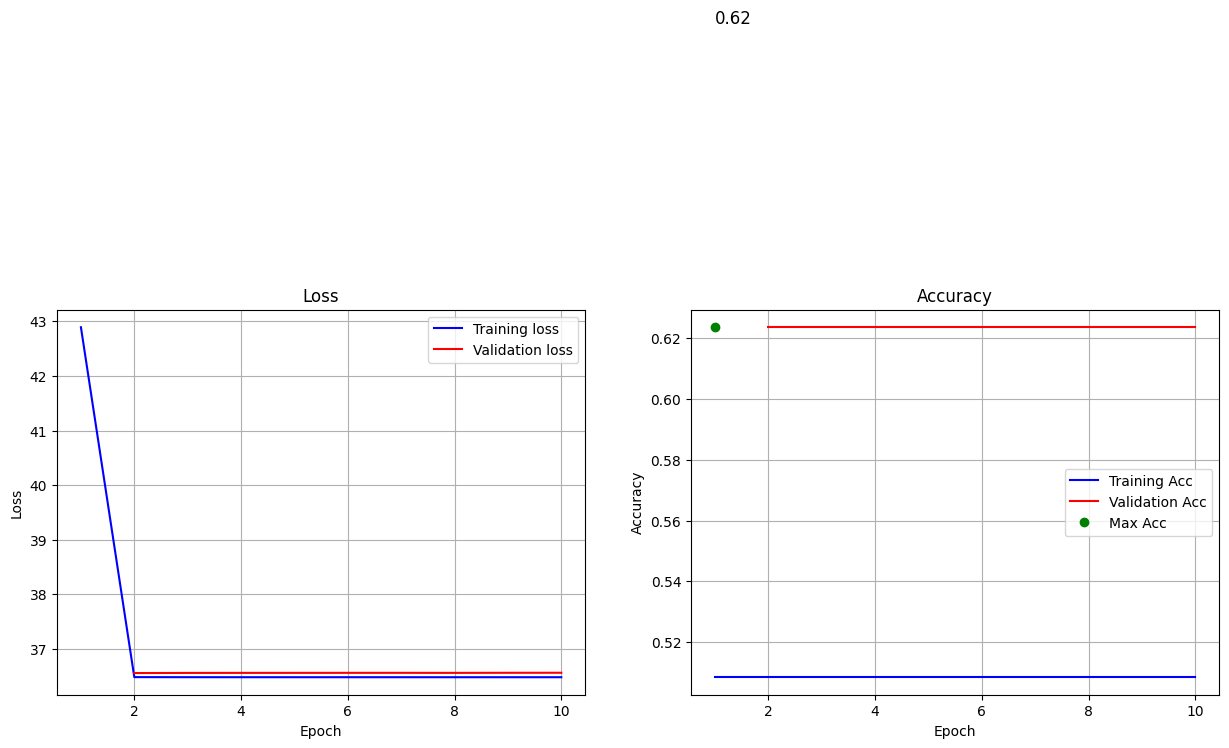

In [53]:
plot_training_history(results_dict, params)

## Test Training With multiple architectures

In [ ]:
# read a txt file containing the decoded nets
import ast
with open('config_files/decoded_nets_1.txt', 'r') as f:
    lines = f.readlines()
    decoded_nets = [ast.literal_eval(line) for line in lines]


In [ ]:
# print the first 5 decoded nets
for i in range(3):
    print(f"Net {i+1}: {decoded_nets[i]}")

In [ ]:
acc_list = {}

In [ ]:
for i, net in enumerate(decoded_nets):
    net_name = f"Net_{i+1}"
    acc = fitness_calculation(id_num=net_name, params=params, fn_dict=fn_dict, net_list=net, debug=True)
    acc_list[net_name] = acc

In [ ]:
from util import create_info_file

In [ ]:
create_info_file(params['experiment_path'], acc_list)

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(acc_list, orient='index', columns=['accuracy'])
df = df.sort_values(by=['accuracy'], ascending=False)

In [ ]:
# plot the accuracy of the decoded nets
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(df.index, df['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Net')
plt.title('Accuracy of the decoded nets')
plt.show()

# Retrain

In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [ ]:
import os
import qnas_config as cfg
from util import check_files
from cnn.input import GenericDataLoader
from cnn.train_detailed import train_and_eval

In [ ]:
phase = 'retrain'
experiment_path = os.path.join("experiments", "exp13_adamw_repeat_2")
config_file = 'config_files/config11.txt'

args = {
    'experiment_path': experiment_path,
    #'config_file': config_file,
    'retrain_folder': 'retrain',
    'data_path': 'cifar10_data',
    'log_level': 'INFO',
    'max_epochs': 300,
    'epochs_to_eval': 10,
    'batch_size': 256,
    'eval_batch_size': 1000,
    'limit_data': False,
    'num_workers': 4,
}

In [ ]:
check_files(args['experiment_path'])
config = cfg.ConfigParameters(args, phase=phase)
config.get_parameters()

fn_dict=config.fn_dict

In [ ]:
config.load_evolved_data(experiment_path=experiment_path)

In [ ]:
params = config.train_spec
params

In [ ]:
evolved_params = config.evolved_params
evolved_params['net']

In [ ]:
data_loader = GenericDataLoader(params=params)

In [ ]:
train_loader, val_loader = data_loader.get_loader(pin_memory_device='cuda:0')
test_loader = data_loader.get_loader(for_train=False, pin_memory_device='cuda:0')

In [ ]:
import pandas as pd

In [ ]:
retrain_multi = []


for i in range(1):
    results = train_and_eval(params=params, fn_dict=fn_dict, net_list=evolved_params['net'], 
                             train_loader=train_loader, val_loader=val_loader, test_loader=test_loader)
    retrain_multi.append(results)
    
    params['experiment_path'] = os.path.join(experiment_path, f"retrain_{i+1}")

results

In [ ]:
# save the results of the retraining into a txt file
with open(os.path.join(experiment_path, 'retrain_results.txt'), 'w') as f:
    for item in retrain_multi:
        f.write("%s\n" % item)

In [ ]:
# results_dict = train_and_eval(params=params, fn_dict=fn_dict, net_list=evolved_params['net'], 
#                               train_loader=train_loader, val_loader=val_loader, test_loader=test_loader)
# results_dict

# Simple Multi-Objective Fitness Function

In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [ ]:
def mofitness(acc, params, inference_time, T_p=11.7e6, T_t=0.02):
    """
    Calculate the fitness of an architecture a.

    :param a: Architecture (this could be a placeholder, as the actual architecture details are abstracted in this function)
    :param err: Classification error of the architecture a (0 <= err <= 1)
    :param params: Number of parameters of the architecture a
    :param inference_time: Inference time of the architecture a
    :param T_p: Maximum allowable number of parameters (default is ResNet18)
    :param T_t: Maximum allowable inference time (default is ResNet50 on CIFAR-10)
    :return: Fitness value
    """
    acc_in_range = 0 <= acc <= 1
    acc = acc if acc_in_range else acc / 100.0
        
    # Determine weights based on parameters and inference time
    if params <= T_p:
        w_p = -0.01
    else:
        w_p = -1

    if inference_time <= T_t:
        w_t = -0.01
    else:
        w_t = -1

    print(f"params: {(params / T_p) ** w_p }")
    print(f"inference_time: {(inference_time / T_t) ** w_t }")
    # Calculate the fitness function
    fitness_value = (acc) * (params / T_p) ** w_p * (inference_time / T_t) ** w_t

    fitness_value = fitness_value if acc_in_range else fitness_value * 100.0
    
    return fitness_value

In [ ]:
# Example usage
architecture = "example_architecture"  # Placeholder
classification_error = 0.9  # Classification error
number_of_params = 1e6
inference_time = 0.01  # Inference time in seconds

fitness_value = mofitness(classification_error, number_of_params, inference_time)
print(f"Fitness value: {fitness_value}")

# Fine Tuning

In [ ]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [ ]:
import copy
import torch
import numpy as np
import qnas_config as cfg
from cnn.input import GenericDataLoader
from cnn.fine_tune_cnn import load_trained_model, freeze_layers
from util import load_log_params_evolution, load_retrain_results

In [ ]:
from cnn.atleta_dataloader import AtletaDataLoader

In [ ]:
args = {
    'dataset_name': 'atleta_coronal',
    #'config_file': config_file,
    'retrain_folder': 'retrain',
    'data_path': 'atleta_coronal_data',
    'batch_size': 32,
    'eval_batch_size': 16,
    'data_augmentation': True,
    'num_workers': 4,
    'resize_size': (32, 32),
}

In [ ]:
# Prepare DataLoaders for the new dataset using AtletaDataLoader
atleta_loader = AtletaDataLoader(
    dataset_name=args['dataset_name'],
    data_path=args['data_path'],
    batch_size=args['batch_size'],
    eval_batch_size=args['eval_batch_size'],
    num_workers=args['num_workers'],
    data_augmentation=args['data_augmentation'],
    resize_size=args['resize_size'],
)

In [ ]:
train_loader, val_loader, test_loader = atleta_loader.get_dataloaders()

In [ ]:
atleta_loader.get_num_classes()

In [ ]:
train_imgs, train_labels = next(iter(train_loader))
train_imgs.shape, train_labels.shape

In [ ]:
train_imgs.shape

In [ ]:
experiment_path = 'experiments_organcmnist_base/exp1_repeat_1'

In [ ]:
params_log = load_log_params_evolution(experiment_path=experiment_path)

In [ ]:
params_log

In [ ]:
retrain_results = load_retrain_results(experiment_path=experiment_path)

In [ ]:
train_spec = params_log['train_spec']
train_spec['fn_dict'] = params_log['fn_dict']
train_spec['best_model_path'] = retrain_results['best_model_path']
train_spec['num_classes_new'] = 3
decode_net = retrain_results['net']
model = load_trained_model(decode_net, train_spec)

In [ ]:
freeze_layers(model, freeze_pattern="all_but_last")

In [ ]:
train_spec['device']

In [ ]:
train_spec

In [ ]:
import torch

desired_gpus = params["available_gpus"]
device_list = [f'cuda:{i}' for i in desired_gpus if i < torch.cuda.device_count()]
device_list

In [ ]:
params['device'] = device_list[0]
params['num_workers'] = 4
params['mixed_precision'] = True
params['batch_size'] = 32
params['eval_batch_size'] = 16
params['max_epochs'] = 10
params['epochs_to_eval'] = 9
params['fn_dict'] = fn_dict

In [ ]:
from cnn.train import fitness_calculation

In [ ]:
data_loader = GenericDataLoader(params=params)
train_loader, val_loader = data_loader.get_loader(pin_memory_device=device_list[0])